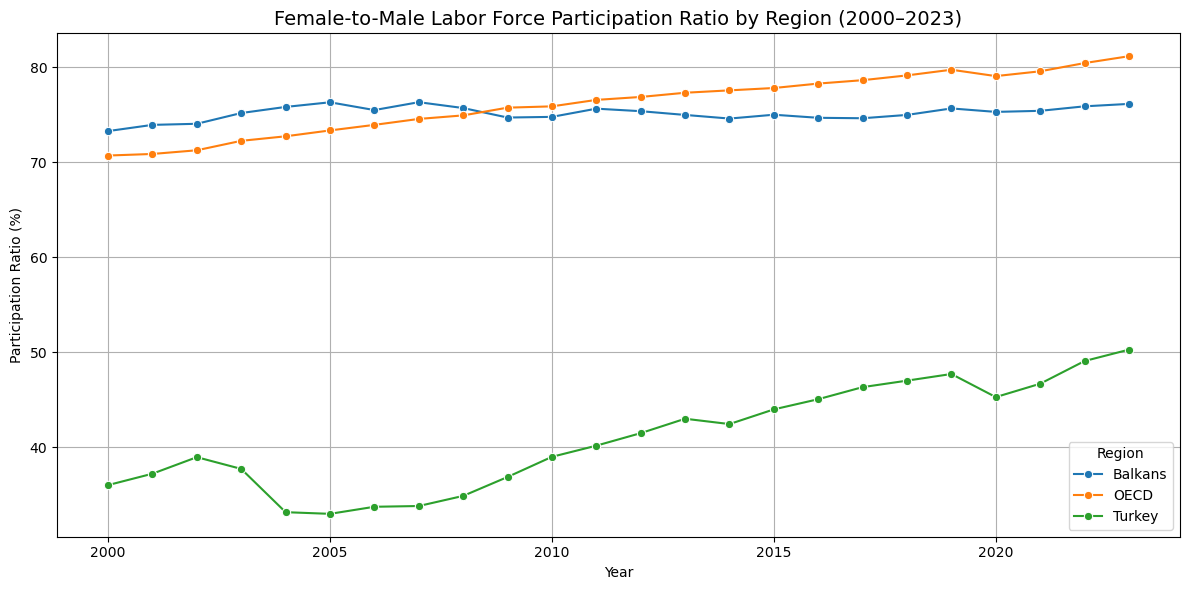

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Set working directory
os.chdir("C:/Users/suna.tatli/Gender Equality Project")

# Step 2: Load the dataset
df = pd.read_csv("Gender_Data.csv")

# Step 3: Filter the target indicator
target_indicator = "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)"
df_ratio = df[df["Series Name"] == target_indicator].copy()

# Step 4: Melt the year columns to long format
year_columns = [col for col in df_ratio.columns if '[YR' in col]
df_melted = df_ratio.melt(
    id_vars=["Country Name"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)

# Step 5: Clean up year and value columns
df_melted["Year"] = df_melted["Year"].str.extract(r'(\d{4})').astype(int)
df_melted["Value"] = pd.to_numeric(df_melted["Value"], errors="coerce")

# Step 6: Define region groups (use exact match from your dataset)
oecd_countries = ["Germany", "Sweden", "France", "United States", "Canada", "Japan", "Korea, Rep.", "Australia", "Mexico", "Chile"]
balkan_countries = ["Albania", "Serbia", "North Macedonia", "Bosnia and Herzegovina", "Montenegro", "Moldova", "Ukraine", "Georgia"]
turkey = ["Turkiye"]  # Match exactly how it appears in your file

def assign_region(country):
    if country in oecd_countries:
        return "OECD"
    elif country in balkan_countries:
        return "Balkans"
    elif country in turkey:
        return "Turkey"
    else:
        return "Other"

# Step 7: Apply region labeling
df_melted["Region"] = df_melted["Country Name"].apply(assign_region)

# Step 8: Group and average
df_grouped = df_melted.groupby(["Region", "Year"])["Value"].mean().reset_index()
df_grouped = df_grouped[df_grouped["Region"].isin(["OECD", "Balkans", "Turkey"])]

# Step 9: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="Year", y="Value", hue="Region", marker="o")
plt.title("Female-to-Male Labor Force Participation Ratio by Region (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Participation Ratio (%)")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

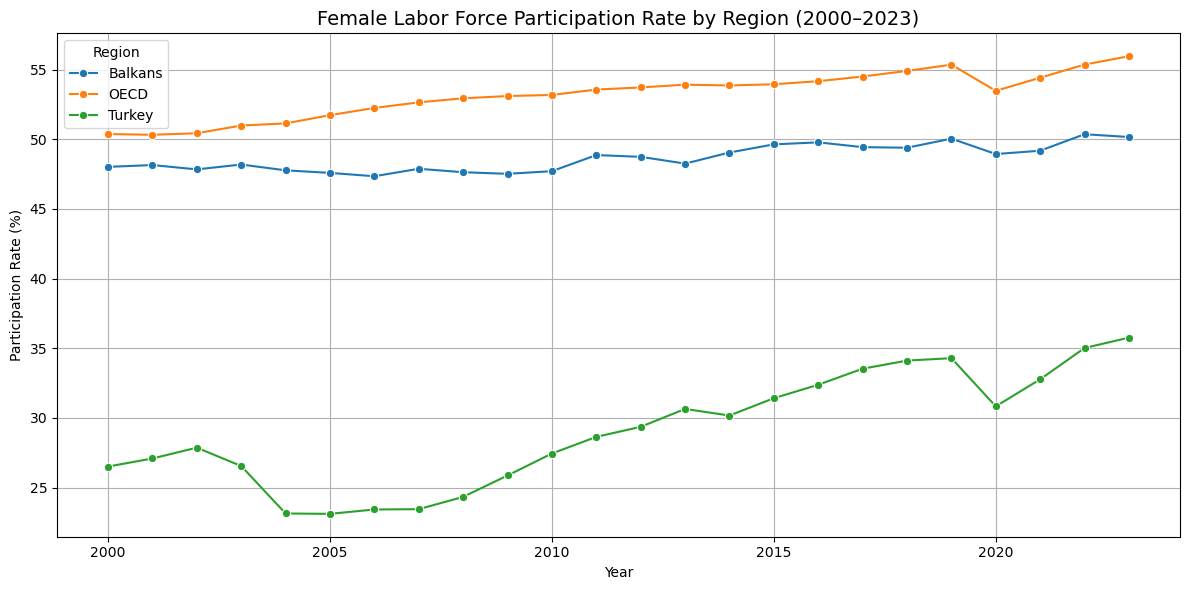

In [53]:
# Step 1: Correct indicator name
target_indicator = "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
df_female = df[df["Series Name"] == target_indicator].copy()

# Step 2: Melt to long format
year_columns = [col for col in df_female.columns if '[YR' in col]
df_melted_female = df_female.melt(
    id_vars=["Country Name"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)

# Step 3: Clean year and value columns
df_melted_female["Year"] = df_melted_female["Year"].str.extract(r'(\d{4})').astype(int)
df_melted_female["Value"] = pd.to_numeric(df_melted_female["Value"], errors="coerce")

# Step 4: Assign region
df_melted_female["Region"] = df_melted_female["Country Name"].apply(assign_region)

# Step 5: Group and average
df_grouped_female = df_melted_female.groupby(["Region", "Year"])["Value"].mean().reset_index()

# ✅ Step 5.1: Remove undefined regions (like 'Other')
df_grouped_female = df_grouped_female[df_grouped_female["Region"].isin(["Turkey", "OECD", "Balkans"])]

# Step 6: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_female, x="Year", y="Value", hue="Region", marker="o")
plt.title("Female Labor Force Participation Rate by Region (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Participation Rate (%)")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

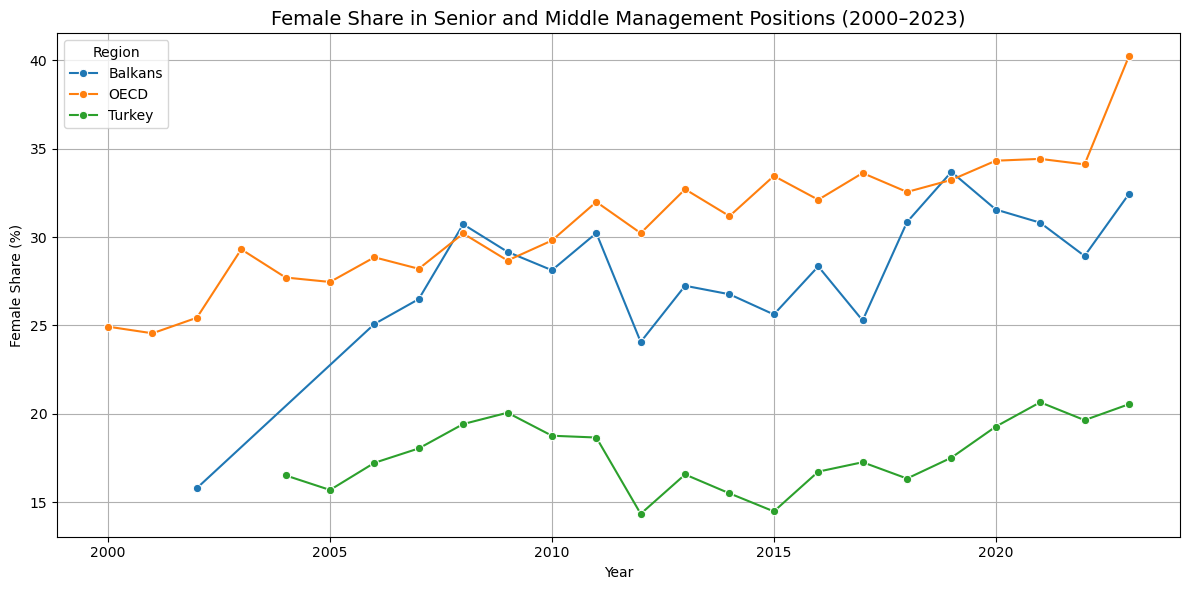

In [55]:
# Step 1: Define the target indicator
target_indicator = "Female share of employment in senior and middle management (%)"
df_mgmt = df[df["Series Name"] == target_indicator].copy()

# Step 2: Melt to long format
year_columns = [col for col in df_mgmt.columns if '[YR' in col]
df_melted_mgmt = df_mgmt.melt(
    id_vars=["Country Name"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)

# Step 3: Clean year and value columns
df_melted_mgmt["Year"] = df_melted_mgmt["Year"].str.extract(r'(\d{4})').astype(int)
df_melted_mgmt["Value"] = pd.to_numeric(df_melted_mgmt["Value"], errors="coerce")

# Step 4: Assign region
df_melted_mgmt["Region"] = df_melted_mgmt["Country Name"].apply(assign_region)

# Step 5: Group and average
df_grouped_mgmt = df_melted_mgmt.groupby(["Region", "Year"])["Value"].mean().reset_index()

# Step 6: Keep only defined regions
df_grouped_mgmt = df_grouped_mgmt[df_grouped_mgmt["Region"].isin(["Turkey", "OECD", "Balkans"])]

# Step 7: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_mgmt, x="Year", y="Value", hue="Region", marker="o")
plt.title("Female Share in Senior and Middle Management Positions (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Female Share (%)")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

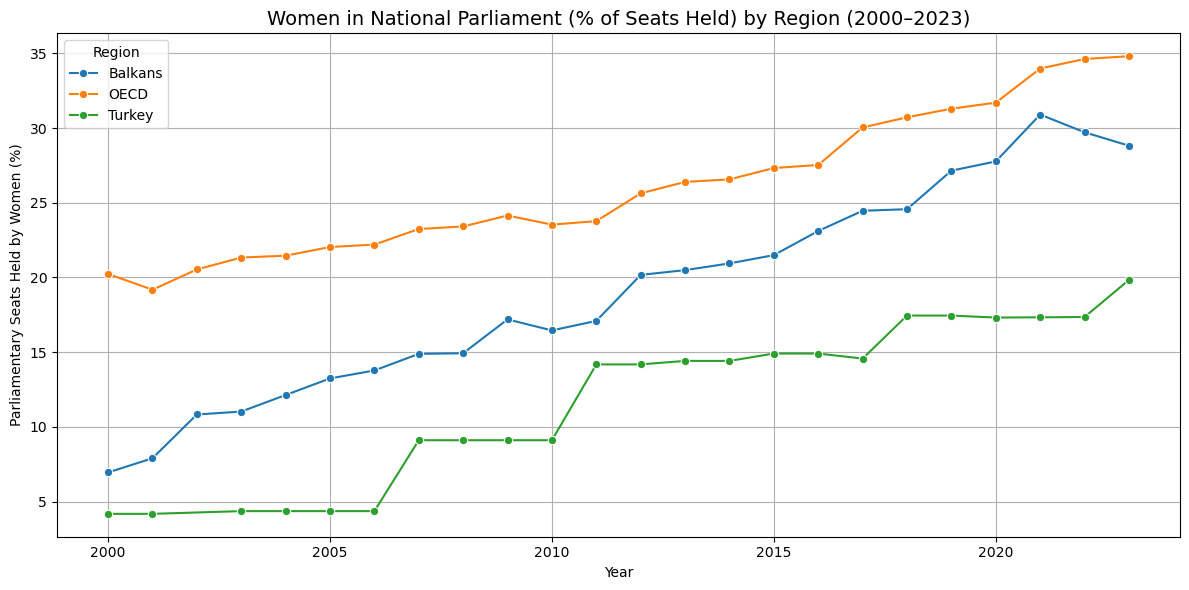

In [57]:
# Step 1: Define the target indicator
target_indicator = "Proportion of seats held by women in national parliaments (%)"
df_parliament = df[df["Series Name"] == target_indicator].copy()

# Step 2: Melt to long format
year_columns = [col for col in df_parliament.columns if '[YR' in col]
df_melted_parliament = df_parliament.melt(
    id_vars=["Country Name"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)

# Step 3: Clean year and value columns
df_melted_parliament["Year"] = df_melted_parliament["Year"].str.extract(r'(\d{4})').astype(int)
df_melted_parliament["Value"] = pd.to_numeric(df_melted_parliament["Value"], errors="coerce")

# Step 4: Assign region
df_melted_parliament["Region"] = df_melted_parliament["Country Name"].apply(assign_region)

# Step 5: Group and average
df_grouped_parliament = df_melted_parliament.groupby(["Region", "Year"])["Value"].mean().reset_index()

# Step 6: Keep only defined regions
df_grouped_parliament = df_grouped_parliament[df_grouped_parliament["Region"].isin(["Turkey", "OECD", "Balkans"])]

# Step 7: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_parliament, x="Year", y="Value", hue="Region", marker="o")
plt.title("Women in National Parliament (% of Seats Held) by Region (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Parliamentary Seats Held by Women (%)")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

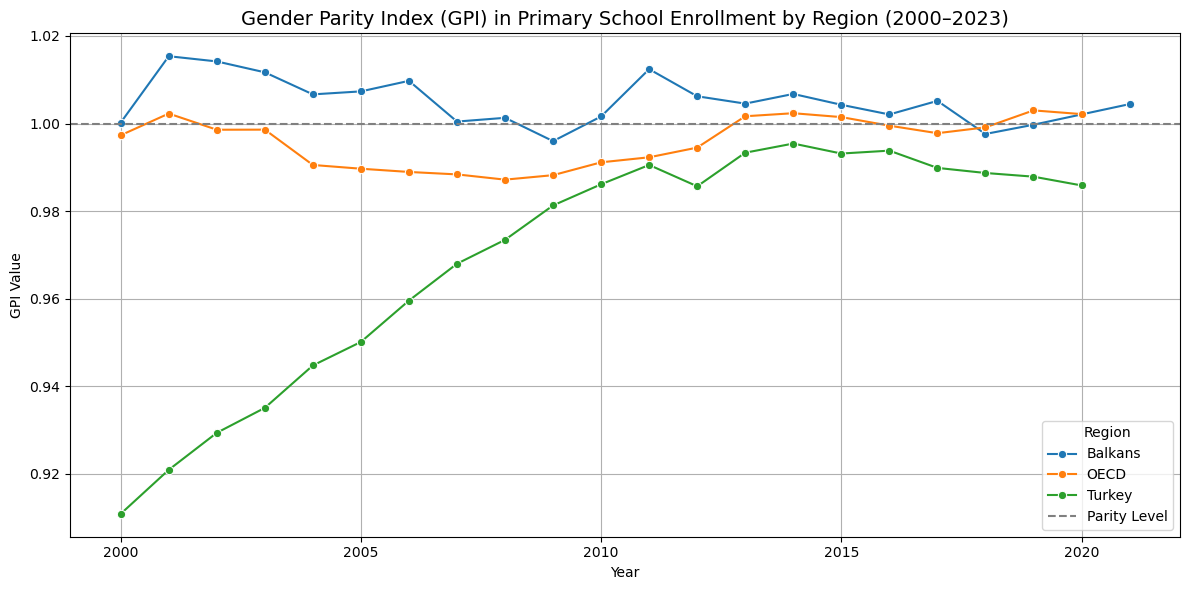

In [59]:
# Step 1: Define the target indicator
target_indicator = "School enrollment, primary (gross), gender parity index (GPI)"
df_gpi = df[df["Series Name"] == target_indicator].copy()

# Step 2: Melt to long format
year_columns = [col for col in df_gpi.columns if '[YR' in col]
df_melted_gpi = df_gpi.melt(
    id_vars=["Country Name"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)

# Step 3: Clean year and value columns
df_melted_gpi["Year"] = df_melted_gpi["Year"].str.extract(r'(\d{4})').astype(int)
df_melted_gpi["Value"] = pd.to_numeric(df_melted_gpi["Value"], errors="coerce")

# Step 4: Assign region
df_melted_gpi["Region"] = df_melted_gpi["Country Name"].apply(assign_region)

# Step 5: Group and average
df_grouped_gpi = df_melted_gpi.groupby(["Region", "Year"])["Value"].mean().reset_index()

# Step 6: Keep only defined regions
df_grouped_gpi = df_grouped_gpi[df_grouped_gpi["Region"].isin(["Turkey", "OECD", "Balkans"])]

# Step 7: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_gpi, x="Year", y="Value", hue="Region", marker="o")
plt.title("Gender Parity Index (GPI) in Primary School Enrollment by Region (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GPI Value")
plt.axhline(1, color="gray", linestyle="--", label="Parity Level")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

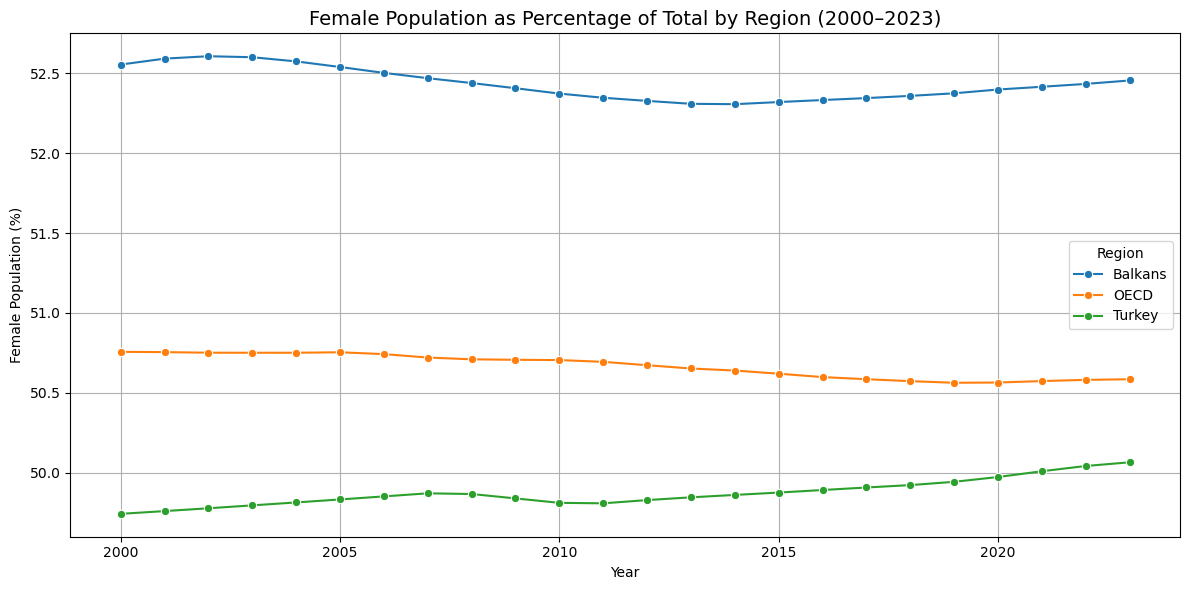

In [61]:
# Step 1: Define the target indicator
target_indicator = "Population, female (% of total)"
df_pop = df[df["Series Name"] == target_indicator].copy()

# Step 2: Melt to long format
year_columns = [col for col in df_pop.columns if '[YR' in col]
df_melted_pop = df_pop.melt(
    id_vars=["Country Name"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Value"
)

# Step 3: Clean year and value columns
df_melted_pop["Year"] = df_melted_pop["Year"].str.extract(r'(\d{4})').astype(int)
df_melted_pop["Value"] = pd.to_numeric(df_melted_pop["Value"], errors="coerce")

# Step 4: Assign region
df_melted_pop["Region"] = df_melted_pop["Country Name"].apply(assign_region)

# Step 5: Group and average
df_grouped_pop = df_melted_pop.groupby(["Region", "Year"])["Value"].mean().reset_index()

# Step 6: Filter only defined regions
df_grouped_pop = df_grouped_pop[df_grouped_pop["Region"].isin(["Turkey", "OECD", "Balkans"])]

# Step 7: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_pop, x="Year", y="Value", hue="Region", marker="o")
plt.title("Female Population as Percentage of Total by Region (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Female Population (%)")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("C:/Users/suna.tatli/Gender Equality Project/Gender_Data.csv")

# Step 2: Define target indicators
gpi_indicator = "School enrollment, primary (gross), gender parity index (GPI)"
labor_indicator = "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"

# Step 3: Get year columns
year_columns = [col for col in df.columns if "[YR" in col]

# Step 4: Calculate country-level averages for GPI and Labor force participation
df_gpi = df[df["Series Name"] == gpi_indicator][["Country Name"] + year_columns].copy()
df_gpi["GPI"] = df_gpi[year_columns].apply(pd.to_numeric, errors="coerce").mean(axis=1)

df_labor = df[df["Series Name"] == labor_indicator][["Country Name"] + year_columns].copy()
df_labor["Labor_Participation"] = df_labor[year_columns].apply(pd.to_numeric, errors="coerce").mean(axis=1)

# Step 5: Merge both indicators into one DataFrame
df_means = pd.merge(
    df_gpi[["Country Name", "GPI"]],
    df_labor[["Country Name", "Labor_Participation"]],
    on="Country Name"
).dropna()

# Step 6: Define region groups
oecd_countries = ["Germany", "Sweden", "France", "United States", "Canada", "Japan", "Korea, Rep.", "Australia", "Mexico", "Chile"]
balkan_countries = ["Albania", "Serbia", "North Macedonia", "Bosnia and Herzegovina", "Montenegro", "Moldova", "Ukraine", "Georgia"]
turkey = ["Turkey", "Turkiye", "Türkiye"]

# Step 7: Assign regions
def assign_region(country):
    if country in oecd_countries:
        return "OECD"
    elif country in balkan_countries:
        return "Balkans"
    elif country in turkey:
        return "Turkey"
    else:
        return None

df_means["Region"] = df_means["Country Name"].apply(assign_region)

# Step 8: Filter only the relevant countries
df_filtered = df_means[df_means["Region"].notnull()].copy()

# Step 9: Preview
print(df_filtered["Region"].value_counts())
print(df_filtered.head())

Region
OECD       9
Balkans    7
Turkey     1
Name: count, dtype: int64
      Country Name       GPI  Labor_Participation   Region
0          Turkiye  0.969711            29.071333   Turkey
1          Albania  1.016350            48.836583  Balkans
2           Serbia  0.998813            45.298583  Balkans
3  North Macedonia  0.989098            41.998125  Balkans
5       Montenegro  1.004802            42.881458  Balkans


In [19]:
# Calculate Pearson correlation within each region
correlations = (
    df_filtered
    .groupby("Region")[["GPI", "Labor_Participation"]]
    .corr()
    .unstack()
    .iloc[:, 1]  # Extract only GPI-Labor correlation
)

print("📌 Correlation between GPI and Female Labor Participation by Region:\n")
print(correlations)

📌 Correlation between GPI and Female Labor Participation by Region:

Region
Balkans   -0.061698
OECD       0.702580
Turkey          NaN
Name: (GPI, Labor_Participation), dtype: float64


In [21]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/suna.tatli/Gender Equality Project/Gender_Data.csv")

# Define indicators
parliament_indicator = "Proportion of seats held by women in national parliaments (%)"
labor_indicator = "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"

# Extract year columns
year_columns = [col for col in df.columns if "[YR" in col]

# Calculate averages
df_parl = df[df["Series Name"] == parliament_indicator][["Country Name"] + year_columns].copy()
df_parl["Parliament"] = df_parl[year_columns].apply(pd.to_numeric, errors="coerce").mean(axis=1)

df_labor = df[df["Series Name"] == labor_indicator][["Country Name"] + year_columns].copy()
df_labor["Labor_Participation"] = df_labor[year_columns].apply(pd.to_numeric, errors="coerce").mean(axis=1)

# Merge datasets
df_corr_politics = pd.merge(
    df_parl[["Country Name", "Parliament"]],
    df_labor[["Country Name", "Labor_Participation"]],
    on="Country Name"
).dropna()

# Assign regions
oecd_countries = ["Germany", "Sweden", "France", "United States", "Canada", "Japan", "Korea, Rep.", "Australia", "Mexico", "Chile"]
balkan_countries = ["Albania", "Serbia", "North Macedonia", "Bosnia and Herzegovina", "Montenegro", "Moldova", "Ukraine", "Georgia"]
turkey = ["Turkey", "Turkiye", "Türkiye"]

def assign_region(country):
    if country in oecd_countries:
        return "OECD"
    elif country in balkan_countries:
        return "Balkans"
    elif country in turkey:
        return "Turkey"
    else:
        return None

df_corr_politics["Region"] = df_corr_politics["Country Name"].apply(assign_region)
df_corr_politics = df_corr_politics[df_corr_politics["Region"].notnull()]

# Calculate correlation by region
correlation_by_region = (
    df_corr_politics
    .groupby("Region")[["Parliament", "Labor_Participation"]]
    .corr()
    .unstack()
    .iloc[:, 1]
)

# Output correlations
print(correlation_by_region)

Region
Balkans   -0.338811
OECD       0.266390
Turkey          NaN
Name: (Parliament, Labor_Participation), dtype: float64


In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/suna.tatli/Gender Equality Project/Gender_Data.csv")

# Define all relevant indicators
indicators = {
    "Female_Population": "Population, female (% of total)",
    "Labor_Force": "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)",
    "GPI": "School enrollment, primary (gross), gender parity index (GPI)",
    "Management": "Female share of employment in senior and middle management (%)",
    "Parliament": "Proportion of seats held by women in national parliaments (%)"
}

# Extract year columns
year_columns = [col for col in df.columns if "[YR" in col]

# Calculate averages for each indicator
avg_data = {}
for key, indicator in indicators.items():
    temp_df = df[df["Series Name"] == indicator][["Country Name"] + year_columns].copy()
    temp_df[key] = temp_df[year_columns].apply(pd.to_numeric, errors="coerce").mean(axis=1)
    avg_data[key] = temp_df[["Country Name", key]]

# Merge all indicators
merged_df = avg_data["Female_Population"]
for key in ["Labor_Force", "GPI", "Management", "Parliament"]:
    merged_df = pd.merge(merged_df, avg_data[key], on="Country Name", how="inner")

# Assign region
def assign_region(country):
    oecd = ["Germany", "Sweden", "France", "United States", "Canada", "Japan", "Korea, Rep.", "Australia", "Mexico", "Chile"]
    balkans = ["Albania", "Serbia", "North Macedonia", "Bosnia and Herzegovina", "Montenegro", "Moldova", "Ukraine", "Georgia"]
    turkey = ["Turkey", "Turkiye", "Türkiye"]
    if country in oecd:
        return "OECD"
    elif country in balkans:
        return "Balkans"
    elif country in turkey:
        return "Turkey"
    else:
        return None

merged_df["Region"] = merged_df["Country Name"].apply(assign_region)
merged_df = merged_df[merged_df["Region"].notnull()]

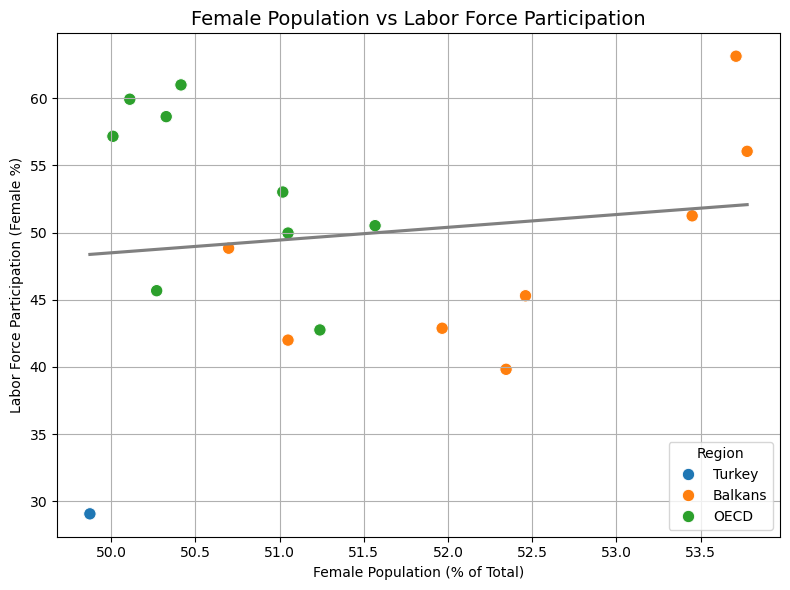

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x="Female_Population", y="Labor_Force", hue="Region", s=80)
sns.regplot(data=merged_df, x="Female_Population", y="Labor_Force", scatter=False, ci=None, color="gray")
plt.title("Female Population vs Labor Force Participation", fontsize=14)
plt.xlabel("Female Population (% of Total)")
plt.ylabel("Labor Force Participation (Female %)")
plt.grid(True)
plt.tight_layout()
plt.show()

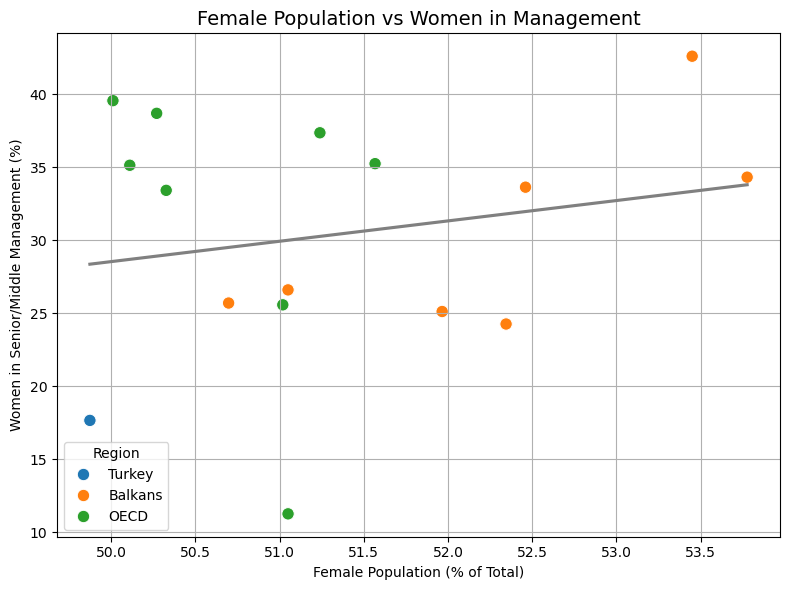

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x="Female_Population", y="Management", hue="Region", s=80)
sns.regplot(data=merged_df, x="Female_Population", y="Management", scatter=False, ci=None, color="gray")
plt.title("Female Population vs Women in Management", fontsize=14)
plt.xlabel("Female Population (% of Total)")
plt.ylabel("Women in Senior/Middle Management (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\suna.tatli\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


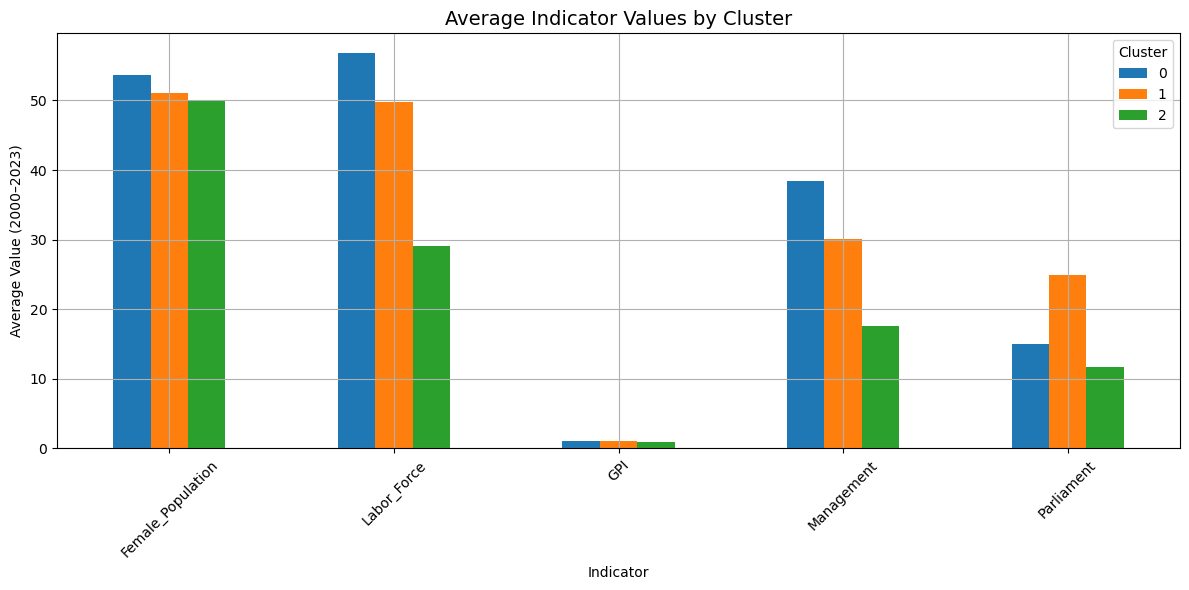


📌 Turkey belongs to Cluster 2
Countries in the same cluster as Turkey:
  Country Name  Region  Cluster
0      Turkiye  Turkey        2


In [37]:
#CLUSTERİNG

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# --- STEP 1: Set working directory ---
os.chdir("C:/Users/suna.tatli/Gender Equality Project")

# --- STEP 2: Load the dataset ---
df = pd.read_csv("Gender_Data.csv")

# --- STEP 3: Define the indicators ---
indicators = {
    "Female_Population": "Population, female (% of total)",
    "Labor_Force": "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)",
    "GPI": "School enrollment, primary (gross), gender parity index (GPI)",
    "Management": "Female share of employment in senior and middle management (%)",
    "Parliament": "Proportion of seats held by women in national parliaments (%)"
}

# --- STEP 4: Calculate average values (2000–2023) ---
year_columns = [col for col in df.columns if "[YR" in col]
avg_data = {}

for key, indicator in indicators.items():
    temp_df = df[df["Series Name"] == indicator][["Country Name"] + year_columns].copy()
    temp_df[key] = temp_df[year_columns].apply(pd.to_numeric, errors="coerce").mean(axis=1)
    avg_data[key] = temp_df[["Country Name", key]]

# --- STEP 5: Merge all indicators ---
merged_df = avg_data["Female_Population"]
for key in ["Labor_Force", "GPI", "Management", "Parliament"]:
    merged_df = pd.merge(merged_df, avg_data[key], on="Country Name", how="inner")

# --- STEP 6: Assign regions ---
def assign_region(country):
    oecd = ["Germany", "Sweden", "France", "United States", "Canada", "Japan", "Korea, Rep.", "Australia", "Mexico", "Chile"]
    balkans = ["Albania", "Serbia", "North Macedonia", "Bosnia and Herzegovina", "Montenegro", "Moldova", "Ukraine", "Georgia"]
    turkey = ["Turkey", "Turkiye", "Türkiye"]
    if country in oecd:
        return "OECD"
    elif country in balkans:
        return "Balkans"
    elif country in turkey:
        return "Turkey"
    else:
        return None

merged_df["Region"] = merged_df["Country Name"].apply(assign_region)
merged_df = merged_df[merged_df["Region"].notnull()]

# --- STEP 7: Prepare data for clustering ---
clustering_data = merged_df.drop(columns=["Country Name", "Region"]).copy()
clustering_data = clustering_data.fillna(clustering_data.mean())  # Fill missing values with column means

# --- STEP 8: Scale the data ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# --- STEP 9: Apply KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df["Cluster"] = kmeans.fit_predict(scaled_data)

# --- STEP 10: Visualize cluster averages ---
cluster_profiles = merged_df.groupby("Cluster")[["Female_Population", "Labor_Force", "GPI", "Management", "Parliament"]].mean()

cluster_profiles.T.plot(kind="bar", figsize=(12, 6))
plt.title("Average Indicator Values by Cluster", fontsize=14)
plt.ylabel("Average Value (2000–2023)")
plt.xlabel("Indicator")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- STEP 11: Print Turkey's cluster and countries in the same cluster ---
turkey_cluster = merged_df[merged_df["Country Name"].str.contains("Turkiye", case=False, na=False)]["Cluster"].values[0]
same_cluster_countries = merged_df[merged_df["Cluster"] == turkey_cluster][["Country Name", "Region", "Cluster"]]

print(f"\n📌 Turkey belongs to Cluster {turkey_cluster}")
print("Countries in the same cluster as Turkey:")
print(same_cluster_countries)

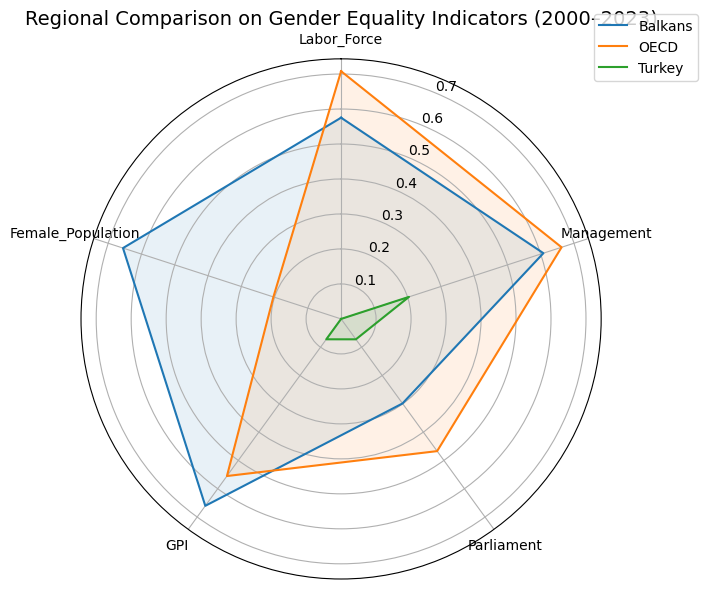

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from current working directory
df = pd.read_csv("Gender_Data.csv")

# Define the indicators for the radar chart
indicators = [
    "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)",
    "Female share of employment in senior and middle management (%)",
    "Proportion of seats held by women in national parliaments (%)",
    "School enrollment, primary (gross), gender parity index (GPI)",
    "Population, female (% of total)"
]

# Shorter column names for readability
rename_dict = {
    indicators[0]: "Labor_Force",
    indicators[1]: "Management",
    indicators[2]: "Parliament",
    indicators[3]: "GPI",
    indicators[4]: "Female_Population"
}

# Prepare a list to store processed indicator dataframes
indicator_dfs = []
for indicator in indicators:
    df_indicator = df[df["Series Name"] == indicator].copy()
    year_columns = df_indicator.columns[df_indicator.columns.str.contains(r"\d{4} \[YR\d{4}\]")]
    df_indicator["Mean_Value"] = df_indicator[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)
    df_indicator = df_indicator[["Country Name", "Mean_Value"]]
    df_indicator.rename(columns={"Mean_Value": rename_dict[indicator]}, inplace=True)
    indicator_dfs.append(df_indicator)

# Merge all indicators into a single dataframe
df_merged = indicator_dfs[0]
for other_df in indicator_dfs[1:]:
    df_merged = pd.merge(df_merged, other_df, on="Country Name")

# Define function to classify countries into regions
def assign_region(country):
    oecd = ["Germany", "Sweden", "France", "United States", "Canada", "Japan", "Korea, Rep.", "Australia", "Mexico", "Chile"]
    balkans = ["Albania", "Serbia", "North Macedonia", "Bosnia and Herzegovina", "Montenegro", "Moldova", "Ukraine", "Georgia"]
    turkey = ["Turkey", "Türkiye", "Turkiye"]
    if country in oecd:
        return "OECD"
    elif country in balkans:
        return "Balkans"
    elif country in turkey:
        return "Turkey"
    else:
        return None

# Apply region classification
df_merged["Region"] = df_merged["Country Name"].apply(assign_region)
df_filtered = df_merged[df_merged["Region"].notnull()].copy()

# Normalize values for radar chart
scaler = MinMaxScaler()
features = list(rename_dict.values())
df_normalized = df_filtered.copy()
df_normalized[features] = scaler.fit_transform(df_normalized[features])

# Compute region-level averages
df_radar = df_normalized.groupby("Region")[features].mean()

# Radar chart setup
labels = features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for region in df_radar.index:
    values = df_radar.loc[region].tolist()
    values += values[:1]
    ax.plot(angles, values, label=region)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Regional Comparison on Gender Equality Indicators (2000–2023)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import os

# Set working directory
os.chdir("C:/Users/suna.tatli/Gender Equality Project")

# Load dataset
df = pd.read_csv("Gender_Data.csv")

# Identify year columns
year_columns = [col for col in df.columns if '[YR' in col]

# Convert all year columns to numeric
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors="coerce")

# Check if conversion was successful
print(df[year_columns].dtypes)

2000 [YR2000]    float64
2001 [YR2001]    float64
2002 [YR2002]    float64
2003 [YR2003]    float64
2004 [YR2004]    float64
2005 [YR2005]    float64
2006 [YR2006]    float64
2007 [YR2007]    float64
2008 [YR2008]    float64
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
2023 [YR2023]    float64
dtype: object


In [59]:
import pandas as pd
import os

# Set working directory
os.chdir("C:/Users/suna.tatli/Gender Equality Project")

# Load dataset
df = pd.read_csv("Gender_Data.csv")

# Identify year columns
year_columns = [col for col in df.columns if '[YR' in col]

# Convert year columns to numeric (in-place)
for col in year_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Indicator dictionary
indicators = {
    "Female_to_Male_Labor_Ratio": "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)",
    "Female_Parliament_Seats": "Proportion of seats held by women in national parliaments (%)",
    "Female_Management_Share": "Female share of employment in senior and middle management (%)",
    "GPI_Primary_Education": "School enrollment, primary (gross), gender parity index (GPI)",
    "Female_Population_Percent": "Population, female (% of total)",
    "Female_Labor_Force_Participation": "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
}

# Store means
means = {}

for key, indicator in indicators.items():
    subset = df[df["Series Name"] == indicator].copy()
    subset["Mean"] = subset[year_columns].mean(axis=1, skipna=True)
    means[key] = subset[["Country Name", "Mean"]].rename(columns={"Mean": key})

# Merge all indicators
df_means = means["Female_to_Male_Labor_Ratio"]
for key in list(means.keys())[1:]:
    df_means = df_means.merge(means[key], on="Country Name", how="outer")

# Show result
print(df_means.head())

             Country Name  Female_to_Male_Labor_Ratio  \
0                 Albania                   73.681642   
1               Australia                   81.865210   
2  Bosnia and Herzegovina                   63.327198   
3                  Canada                   85.396210   
4                   Chile                   62.683302   

   Female_Parliament_Seats  Female_Management_Share  GPI_Primary_Education  \
0                17.703832                25.701412               1.016350   
1                27.645528                33.418696               1.006729   
2                18.722944                24.265111                    NaN   
3                24.625630                      NaN               1.000429   
4                17.972183                38.692700               0.965691   

   Female_Population_Percent  Female_Labor_Force_Participation  
0                  50.697181                         48.836583  
1                  50.326542                         58.62

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Set working directory and load data
file_path = "C:/Users/suna.tatli/Gender Equality Project/Gender_Data.csv"
df = pd.read_csv(file_path)

# Step 2: Clean year columns by converting them to numeric
year_columns = [col for col in df.columns if '[YR' in col]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Define indicators and keys
indicators = {
    "Female_to_Male_Labor_Ratio": "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)",
    "Female_Parliament_Seats": "Proportion of seats held by women in national parliaments (%)",
    "Female_Management_Share": "Female share of employment in senior and middle management (%)",
    "GPI_Primary_Education": "School enrollment, primary (gross), gender parity index (GPI)",
    "Female_Population_Percent": "Population, female (% of total)",
    "Female_Labor_Force_Participation": "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
}

# Step 4: Calculate means across years
means = {}
for key, indicator in indicators.items():
    subset = df[df["Series Name"] == indicator].copy()
    subset["Mean"] = subset[year_columns].astype(float).mean(axis=1, skipna=True)
    means[key] = subset[["Country Name", "Mean"]].rename(columns={"Mean": key})

# Step 5: Merge all indicators into one DataFrame
df_merged = means["Female_to_Male_Labor_Ratio"]
for key in list(indicators.keys())[1:]:
    df_merged = pd.merge(df_merged, means[key], on="Country Name", how="outer")

# Optional: Show result
print(df_merged.head())

             Country Name  Female_to_Male_Labor_Ratio  \
0                 Albania                   73.681642   
1               Australia                   81.865210   
2  Bosnia and Herzegovina                   63.327198   
3                  Canada                   85.396210   
4                   Chile                   62.683302   

   Female_Parliament_Seats  Female_Management_Share  GPI_Primary_Education  \
0                17.703832                25.701412               1.016350   
1                27.645528                33.418696               1.006729   
2                18.722944                24.265111                    NaN   
3                24.625630                      NaN               1.000429   
4                17.972183                38.692700               0.965691   

   Female_Population_Percent  Female_Labor_Force_Participation  
0                  50.697181                         48.836583  
1                  50.326542                         58.62

In [63]:
# Highlight countries with extreme values in each indicator
for col in df_merged.columns[1:]:
    max_row = df_merged.loc[df_merged[col].idxmax()]
    min_row = df_merged.loc[df_merged[col].idxmin()]
    
    print(f"🔺 Highest {col}: {max_row['Country Name']} ({max_row[col]:.2f})")
    print(f"🔻 Lowest {col}: {min_row['Country Name']} ({min_row[col]:.2f})\n")

🔺 Highest Female_to_Male_Labor_Ratio: Moldova (96.93)
🔻 Lowest Female_to_Male_Labor_Ratio: Turkiye (40.98)

🔺 Highest Female_Parliament_Seats: Sweden (45.37)
🔻 Lowest Female_Parliament_Seats: Japan (9.16)

🔺 Highest Female_Management_Share: Ukraine (42.60)
🔻 Lowest Female_Management_Share: Japan (11.27)

🔺 Highest GPI_Primary_Education: Georgia (1.02)
🔻 Lowest GPI_Primary_Education: Chile (0.97)

🔺 Highest Female_Population_Percent: Georgia (53.78)
🔻 Lowest Female_Population_Percent: Turkiye (49.87)

🔺 Highest Female_Labor_Force_Participation: Korea, Dem. People's Rep. (77.47)
🔻 Lowest Female_Labor_Force_Participation: Turkiye (29.07)

